1584. Min Cost to Connect All Points

You are given an array points representing integer coordinates of some points on a 2D-plane, where points[i] = [xi, yi].

The cost of connecting two points [xi, yi] and [xj, yj] is the manhattan distance between them: |xi - xj| + |yi - yj|, where |val| denotes the absolute value of val.

Return the minimum cost to make all points connected. All points are connected if there is exactly one simple path between any two points.

 

Example 1:

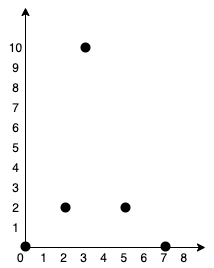

Input: points = [[0,0],[2,2],[3,10],[5,2],[7,0]]
Output: 20
Explanation: 

We can connect the points as shown above to get the minimum cost of 20.
Notice that there is a unique path between every pair of points.
Example 2:

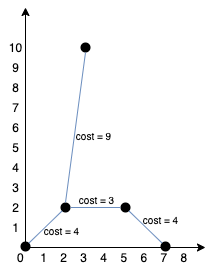

Input: points = [[3,12],[-2,5],[-4,1]]
Output: 18
 

Constraints:

1 <= points.length <= 1000
-106 <= xi, yi <= 106
All pairs (xi, yi) are distinct.

In [ ]:
class UnionFind:
    def __init__(self,n):
        self.par = {}
        self.rank = {}

        for i in range(n+1):
            self.par[i] = i
            self.rank[i] = 0

    def find(self,n):
        p = self.par[n]
        while p != self.par[p]:
            self.par[p] = self.par[self.par[p]]
            p = self.par[p]
        return p

    def union(self,n1,n2):
        p1,p2 = self.find(n1),self.find(n2)

        if p1 == p2:
            return False
        if self.rank[p1] > self.rank[p2]:
            self.par[p2] = p1
            self.rank[p1] += self.rank[p2]
        else:
            self.par[p1] = p2
            self.rank[p2] += self.rank[p1]
        return True

class Solution:

    def minCostConnectPoints(self, points):
        uf = UnionFind(len(points))
        minHeap = []
        for i in range(len(points)):
            x1,y1 = points[i]
            for j in range(i+1,len(points)):
                x2,y2 = points[j]
                cost = abs(x1-x2) + abs(y1-y2)
                minHeap.append([cost,i,j])
        minHeap.sort()
        wt_mst = 0
        for wt,n1,n2 in minHeap:
            if uf.union(n1,n2):
                wt_mst += wt
        return wt_mst

721. Accounts Merge

Given a list of accounts where each element accounts[i] is a list of strings, where the first element accounts[i][0] is a name, and the rest of the elements are emails representing emails of the account.

Now, we would like to merge these accounts. Two accounts definitely belong to the same person if there is some common email to both accounts. Note that even if two accounts have the same name, they may belong to different people as people could have the same name. A person can have any number of accounts initially, but all of their accounts definitely have the same name.

After merging the accounts, return the accounts in the following format: the first element of each account is the name, and the rest of the elements are emails in sorted order. The accounts themselves can be returned in any order.

 

Example 1:

Input: accounts = [["John","johnsmith@mail.com","john_newyork@mail.com"],["John","johnsmith@mail.com","john00@mail.com"],["Mary","mary@mail.com"],["John","johnnybravo@mail.com"]]
Output: [["John","john00@mail.com","john_newyork@mail.com","johnsmith@mail.com"],["Mary","mary@mail.com"],["John","johnnybravo@mail.com"]]
Explanation:
The first and second John's are the same person as they have the common email "johnsmith@mail.com".
The third John and Mary are different people as none of their email addresses are used by other accounts.
We could return these lists in any order, for example the answer [['Mary', 'mary@mail.com'], ['John', 'johnnybravo@mail.com'], 
['John', 'john00@mail.com', 'john_newyork@mail.com', 'johnsmith@mail.com']] would still be accepted.
Example 2:

Input: accounts = [["Gabe","Gabe0@m.co","Gabe3@m.co","Gabe1@m.co"],["Kevin","Kevin3@m.co","Kevin5@m.co","Kevin0@m.co"],["Ethan","Ethan5@m.co","Ethan4@m.co","Ethan0@m.co"],["Hanzo","Hanzo3@m.co","Hanzo1@m.co","Hanzo0@m.co"],["Fern","Fern5@m.co","Fern1@m.co","Fern0@m.co"]]
Output: [["Ethan","Ethan0@m.co","Ethan4@m.co","Ethan5@m.co"],["Gabe","Gabe0@m.co","Gabe1@m.co","Gabe3@m.co"],["Hanzo","Hanzo0@m.co","Hanzo1@m.co","Hanzo3@m.co"],["Kevin","Kevin0@m.co","Kevin3@m.co","Kevin5@m.co"],["Fern","Fern0@m.co","Fern1@m.co","Fern5@m.co"]]
 

Constraints:

1 <= accounts.length <= 1000
2 <= accounts[i].length <= 10
1 <= accounts[i][j].length <= 30
accounts[i][0] consists of English letters.
accounts[i][j] (for j > 0) is a valid email.

In [3]:
from collections import defaultdict
class UnionFind:
    def __init__(self,n):
        self.par = [i for i in range(n)]
        self.rank = [1] * n

    def find(self,p):
        while p != self.par[p]:
            self.par[p] = self.par[self.par[p]]
            p = self.par[p]
        return p

    def union(self,n1,n2):
        p1,p2 = self.find(n1),self.find(n2)

        if p1 == p2:
            return False
        
        if self.rank[p1] > self.rank[p2]:
            self.par[p2] = p1
            self.rank[p1] += self.rank[p2]
        else:
            self.par[p1] = p2
            self.rank[p2] += self.par[p1]
        return True

class Solution(object):
    def accountsMerge(self, accounts):
        """
        :type accounts: List[List[str]]
        :rtype: List[List[str]]
        """
        uf = UnionFind(len(accounts))

        emailToIndx = {} # { email1:1 , email2:2,...}
        for indx,emails in enumerate(accounts):
            for email in emails[1:]:
                if email in emailToIndx:
                    uf.union(indx,emailToIndx[email])  #[0,1,2,1,4]
                else:
                    emailToIndx[email] = indx

        emailGroup = defaultdict(list) # {1:[email1,email3],2:[email2]..}
        for email,indx in emailToIndx.items():
            root = uf.find(indx)
            emailGroup[root].append(email)
        
        ans = []
        for indx,emails in emailGroup.items():
            ans.append([accounts[indx][0]] + sorted(emails))
        return ans

        
accounts = [["John","johnsmith@mail.com","john_newyork@mail.com"],["John","johnsmith@mail.com","john00@mail.com"],["Mary","mary@mail.com"],["John","johnnybravo@mail.com"]]
Solution().accountsMerge(accounts)

[['John', 'john00@mail.com', 'john_newyork@mail.com', 'johnsmith@mail.com'],
 ['Mary', 'mary@mail.com'],
 ['John', 'johnnybravo@mail.com']]

1489. Find Critical and Pseudo-Critical Edges in Minimum Spanning Tree

Given a weighted undirected connected graph with n vertices numbered from 0 to n - 1, and an array edges where edges[i] = [ai, bi, weighti] represents a bidirectional and weighted edge between nodes ai and bi. A minimum spanning tree (MST) is a subset of the graph's edges that connects all vertices without cycles and with the minimum possible total edge weight.

Find all the critical and pseudo-critical edges in the given graph's minimum spanning tree (MST). An MST edge whose deletion from the graph would cause the MST weight to increase is called a critical edge. On the other hand, a pseudo-critical edge is that which can appear in some MSTs but not all.

Note that you can return the indices of the edges in any order.

 

Example 1:

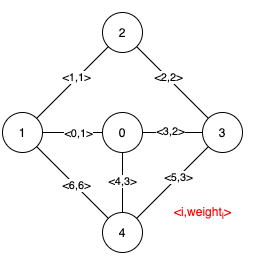

Input: n = 5, edges = [[0,1,1],[1,2,1],[2,3,2],[0,3,2],[0,4,3],[3,4,3],[1,4,6]]
Output: [[0,1],[2,3,4,5]]
Explanation: The figure above describes the graph.
The following figure shows all the possible MSTs:

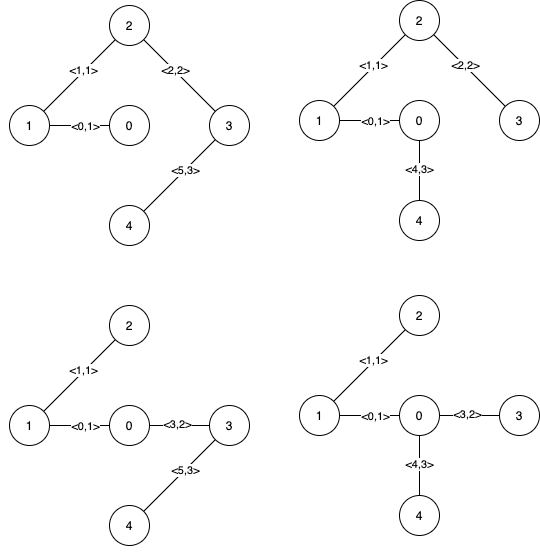
Notice that the two edges 0 and 1 appear in all MSTs, therefore they are critical edges, so we return them in the first list of the output.
The edges 2, 3, 4, and 5 are only part of some MSTs, therefore they are considered pseudo-critical edges. We add them to the second list of the output.
Example 2:
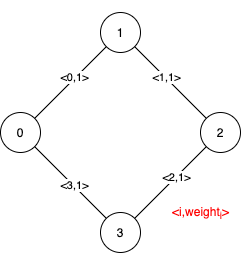
Input: n = 4, edges = [[0,1,1],[1,2,1],[2,3,1],[0,3,1]]
Output: [[],[0,1,2,3]]
Explanation: We can observe that since all 4 edges have equal weight, choosing any 3 edges from the given 4 will yield an MST. Therefore all 4 edges are pseudo-critical.
 

Constraints:

2 <= n <= 100
1 <= edges.length <= min(200, n * (n - 1) / 2)
edges[i].length == 3
0 <= ai < bi < n
1 <= weighti <= 1000
All pairs (ai, bi) are distinct.

In [6]:
class UnionFind:
    def __init__(self,n):
        self.par = [i for i in range(n)]
        self.rank = [1] * n

    def find(self,p):
        while p != self.par[p]:
            self.par[p] = self.par[self.par[p]]
            p = self.par[p]
        return p
    
    def union(self,n1,n2):
        p1,p2 = self.find(n1),self.find(n2)

        if p1 == p2:
            return False
        
        if self.rank[p1] > self.rank[p2]:
            self.par[p2] = p1
            self.rank[p1] += self.rank[p2]
        else:
            self.par[p1] = p2
            self.rank[p2] += self.rank[p1]

        return True

class Solution(object):
    def findCriticalAndPseudoCriticalEdges(self, n, edges):
        """
        :type n: int
        :type edges: List[List[int]]
        :rtype: List[List[int]]
        """
        uf = UnionFind(n)

        for indx,edge in enumerate(edges):
            edge.append(indx)
        edges.sort(key = lambda edge: edge[2])

        mst_wt = 0
        for n1,n2,wt,indx in edges:
            if uf.union(n1,n2):
                mst_wt += wt

        critical, pCritical = [],[]
        for n1,n2,wt,indx in edges:

            uf = UnionFind(n)
            weight = 0
            for e1,e2,cwt,i in edges:
                if indx != i and uf.union(e1,e2):
                    weight += cwt
            if max(uf.rank) != n or weight > mst_wt:
                critical.append(indx)
                continue

            uf = UnionFind(n)
            uf.union(n1,n2)
            weight = wt
            for e1,e2,cwt,i in edges:
                if indx != i and uf.union(e1,e2):
                    weight += cwt
            if weight == mst_wt:
                pCritical.append(indx)

        return [critical,pCritical]

n = 5 
edges = [[0,1,1],[1,2,1],[2,3,2],[0,3,2],[0,4,3],[3,4,3],[1,4,6]]
Solution().findCriticalAndPseudoCriticalEdges(n,edges)

[[0, 1], [2, 3, 4, 5]]